## Profiling (7 pts + 2 bonus pts)

Before we go any further and start looking at how vectorization makes your program faster, we need to talk about profiling. Profiling is the act of measuring performance of a program, either by timing it or by looking into memory access, depending on what is you are trying to measure.

(Follow the instructions here: https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html to setup the profilers)

# **Remember to save your file after generating all the required results. Then we can directly see your results.**

### Time

This is the most common profiler. In a python code you just import the time module and measure starting and ending time. For IPython we can call the %time %%time and %%timeit magic

In [1]:
%time?

Docstring:
Time execution of a Python statement or expression.

The CPU and wall clock times are printed, and the value of the
expression (if any) is returned.  Note that under Win32, system time
is always reported as 0, since it can not be measured.

This function can be used both as a line and cell magic:

- In line mode you can time a single-line statement (though multiple
  ones can be chained with using semicolons).

- In cell mode, you can time the cell body (a directly
  following statement raises an error).

This function provides very basic timing functionality.  Use the timeit
magic for more control over the measurement.

.. versionchanged:: 7.3
    User variables are no longer expanded,
    the magic line is always left unmodified.

Examples
--------
::

  In [1]: %time 2**128
  CPU times: user 0.00 s, sys: 0.00 s, total: 0.00 s
  Wall time: 0.00
  Out[1]: 340282366920938463463374607431768211456L

  In [2]: n = 1000000

  In [3]: %time sum(range(n))
  CPU times: user 1.20 s,

# Question 1 (0.5 pts)
Run the following code and explain its output

In [3]:
%%time
total = 0
for i in range(1000):
    for j in range(1000):
        total += i * (-1) ** j

CPU times: user 1.4 s, sys: 8 ms, total: 1.41 s
Wall time: 1.43 s


#### The code is a nested for loop with 1000\*1000 iterations. The report tells us that it took 1.36 seconds to run it on the cpu and the total time on the clock was 1.37 seconds

# Question 2 (0.5)
There are two blocks of code below performing the same function on a given input, explain why the second sort is much faster

In [4]:
import random
L = [random.random() for i in range(100000)]
%time L.sort()

CPU times: user 136 ms, sys: 4 ms, total: 140 ms
Wall time: 143 ms


In [5]:
%time L.sort()

CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 16.8 ms


The first block has unsorted values but since we run it and than run sort on it again in the second block the data is already sorted

# Question 3 (1 pts)
Use Python memory_profiler to profile your own code and explain the results

In [6]:
!pip3 install memory_profiler

Defaulting to user installation because normal site-packages is not writeable


In [7]:
%load_ext memory_profiler

In [18]:
def sum_of_lists(N):
    total = 0
    for i in range(5):
        L = [j ^ (j >> i) for j in range(N)]
        total += sum(L)
    return total

In [19]:
%memit sum_of_lists(100000)

peak memory: 61.30 MiB, increment: 6.81 MiB


In [24]:
def sum_of_lists2(N):
    total = [0] * N
    for i in range(N):
        total[i] += N + i
    return total
%memit sum_of_lists2(100000)

peak memory: 57.07 MiB, increment: 1.34 MiB


In [25]:
def sum_of_lists3(N):
    total = 0
    for i in range(N):
        total += N + i
    return total
%memit sum_of_lists3(100000)

peak memory: 56.71 MiB, increment: 0.00 MiB


When memory is allocated through a data strucutre like a list, there is an incriment in the peak memory, however when no large object is created like a int, there is little to nonmeasurable increase in the bumber of MiB

# Question 4 (7 pts)
Run the following codes to measure execution time, memory usage and answer the following questions.
Note: Make sure to install any missing Python packages

1. This code snippet defines and runs a simple Python function hello() that prints 'hello world!'. It also employs the memory_profiler module to profile the memory usage of the hello() function with a specified precision.

In [58]:
%%time
%%file helloworld.py

from memory_profiler import profile

@profile(precision=4)
def hello():
	print("hello world!") 

hello()

Overwriting helloworld.py
CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 3.72 ms


In [59]:
%run -i helloworld.py

hello world!
Filename: /home/jerry/Documents/CS131/lab1/helloworld.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     4  72.0312 MiB  72.0312 MiB           1   @profile(precision=4)
     5                                         def hello():
     6  72.0312 MiB   0.0000 MiB           1   	print("hello world!") 




2. This code snippet demonstrates memory profiling for a Python function my_func() that creates, manipulates, and deletes large lists, showcasing how memory usage changes with these operations

In [60]:
%%time
%%file expressions.py
from memory_profiler import profile
@profile(precision=4)
def my_func():
    a = [1] * (10 ** 6)
    b = [2] * (2 * 10 ** 7)
    del b
    return a
my_func()

Overwriting expressions.py
CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 3.15 ms


In [61]:
%run -i expressions.py

Filename: /home/jerry/Documents/CS131/lab1/expressions.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     2  72.0312 MiB  72.0312 MiB           1   @profile(precision=4)
     3                                         def my_func():
     4  74.4961 MiB   2.4648 MiB           1       a = [1] * (10 ** 6)
     5 227.1211 MiB 152.6250 MiB           1       b = [2] * (2 * 10 ** 7)
     6  74.6016 MiB -152.5195 MiB           1       del b
     7  74.6016 MiB   0.0000 MiB           1       return a




3. This code snippet profiles memory usage of the function math_funcs(), which demonstrates the application of logarithmic, cosine, and reciprocal functions from the NumPy library on an array of numbers, and prints the results for each operation.

In [71]:
%%time
%%file math_funcs.py
from memory_profiler import profile
import math
import numpy as np

@profile(precision=4)
def math_funcs():
	inp_arr = [10, 20, 30, 40, 50] 
	print ("Array input elements:\n", inp_arr) 

	res_arr = np.log(inp_arr) 
	print ("Applying log function:\n", res_arr)

	res_arr2 = np.cos(inp_arr) 
	print ("Applying cos function:\n", res_arr2)

	res_arr3 = np.reciprocal(inp_arr) 
	print ("Applying reciprocal function:\n", res_arr3)


math_funcs()

Overwriting math_funcs.py
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 7.3 ms


In [69]:
%run -i math_funcs.py

Array input elements:
 [10, 20, 30, 40, 50]
Applying log function:
 [ 2.30258509  2.99573227  3.40119738  3.68887945  3.91202301]
Applying cos function:
 [-0.83907153  0.40808206  0.15425145 -0.66693806  0.96496603]
Applying reciprocal function:
 [0 0 0 0 0]
Filename: /home/jerry/Documents/CS131/lab1/math_funcs.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     5  74.6211 MiB  74.6211 MiB           1   @profile(precision=4)
     6                                         def math_funcs():
     7  74.6211 MiB   0.0000 MiB           1   	inp_arr = [10, 20, 30, 40, 50] 
     8  74.6211 MiB   0.0000 MiB           1   	print ("Array input elements:\n", inp_arr) 
     9                                         
    10  74.6289 MiB   0.0078 MiB           1   	res_arr = np.log(inp_arr) 
    11  74.6289 MiB   0.0000 MiB           1   	print ("Applying log function:\n", res_arr)
    12                                         
    13  74.6289 MiB   0.0000 MiB           1   	res_

4. This code snippet, using memory profiling, demonstrates a nested loop in Python where it iterates through combinations of adjectives and fruit names, printing each pair.

In [64]:
%%time
%%file loops.py
from memory_profiler import profile
import numpy as np
import ctypes
import math
import time

@profile(precision=4)
def my_loops():
	adj = ["red", "big", "tasty"]
	fruits = ["apple", "banana", "cherry"]

	for x in adj:
 		 for y in fruits:
   			 print(x, y)


my_loops()

Overwriting loops.py
CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 3.94 ms


In [53]:
%run -i loops.py

red apple
red banana
red cherry
big apple
big banana
big cherry
tasty apple
tasty banana
tasty cherry
Filename: /home/jerry/Documents/CS131/lab1/loops.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     7  72.0312 MiB  72.0312 MiB           1   @profile(precision=4)
     8                                         def my_loops():
     9  72.0312 MiB   0.0000 MiB           1   	adj = ["red", "big", "tasty"]
    10  72.0312 MiB   0.0000 MiB           1   	fruits = ["apple", "banana", "cherry"]
    11                                         
    12  72.0312 MiB   0.0000 MiB           4   	for x in adj:
    13  72.0312 MiB   0.0000 MiB          12    		 for y in fruits:
    14  72.0312 MiB   0.0000 MiB           9      			 print(x, y)




## Question 4.1 (1.5 pts)
Modify each of the above function to capture their execution time (Both CPU and Wall). You can modify the code directly, if required.

In [27]:
# code above was modified

## Question 4.2 (1.5 pts)

What patterns did you notice between each of the above function with respect to latency, memory usage and code ?


We noticed on all the above functions that they all had the cpu time of 4ms, even when we reran the functions they still maintained a cpu of 4ms, however the wall time would change. For the latency we noticed that in real time it was changing every time we re ran the function. For the memory usage we noticed that of course when we allocated more memory for the arrays our memory usage went up, but for printing and small arrays the memory usage was incremented very little.

## Question 4.3 (2 pts)
Using %time magic command, we can trace overall code execution time. Sometimes, you might have to get deeper insights to identify performance bottlenecks. Write your own code and profile execution time line by line.

In [28]:
!pip install line_profiler

Defaulting to user installation because normal site-packages is not writeable


In [111]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [47]:
%%time
%%file func.py
from memory_profiler import profile

@profile(precision=4)
def func(n):
    adj = ["red", "big", "tasty"] * (10 ** 6)
    fruits = ["apple", "banana", "cherry"]
        
    for i in range(n):
        a = [1] * (10 ** 6)
    return a
                   
func(2)

Overwriting func.py
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 2.24 ms


In [48]:
%run -i func.py

Filename: /home/jerry/Documents/CS131/lab1/func.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     3  78.8359 MiB  78.8359 MiB           1   @profile(precision=4)
     4                                         def func(n):
     5  78.8359 MiB   0.0000 MiB           1       adj = ["red", "big", "tasty"] * (10 ** 6)
     6  78.8359 MiB   0.0000 MiB           1       fruits = ["apple", "banana", "cherry"]
     7                                                 
     8  93.9688 MiB   0.0000 MiB           3       for i in range(n):
     9  93.9688 MiB  15.1328 MiB           2           a = [1] * (10 ** 6)
    10  93.9688 MiB   0.0000 MiB           1       return a




## (Bonus) Question 4.4 (2 pts)
Memory usage of a program can also be reported as a function of time. Profile memory of any of the above code as a function of time.
Submit your profile results and a plot of the results (Mem used vs Time).

In [51]:
%%time
%%file func.py
from memory_profiler import profile

@profile(precision=4)
def sum_list(N):
    vals = []
    for i in range(N):
        vals.append(i)
    
    total = 0
    for i in range(N):
        total += vals[i]
    
    return total

sum_list(10**4)

Overwriting func.py
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.61 ms


In [68]:
from memory_profiler import memory_usage
import time 
import matplotlib.pyplot as plt 

memory = []
times = []
N = 10**6

start_time = time.time()
for mem in memory_usage((sum_list, (N, )), interval=0.1, retval=False):
    memory.append(mem)
    times.append(time.time() - start_time)

times = [t -times[0] for t in times]

[0.0,
 3.337860107421875e-06,
 4.76837158203125e-06,
 6.198883056640625e-06,
 7.62939453125e-06,
 9.5367431640625e-06,
 1.049041748046875e-05,
 1.1682510375976562e-05,
 1.33514404296875e-05]

Plot goes here

Text(0.5,0,'Time since execution')

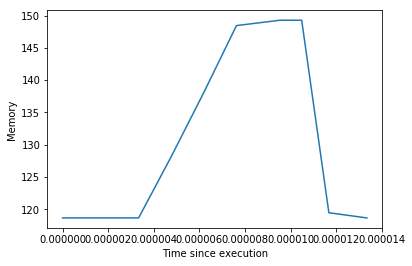

In [73]:
plt.plot(times, memory)
plt.ylabel("Memory")
plt.xlabel("Time since execution")